In [39]:
!pip install ultralytics matplotlib pandas opencv-python

In [40]:
import torch
print(torch.cuda.is_available())

True


In [41]:
import os

dataset_path = "/kaggle/input/datasets/thedatasith/sku110k-annotations/SKU110K_fixed"
print(os.listdir(dataset_path))

['labels', 'images']


In [42]:

!ls /kaggle/input/datasets/thedatasith/sku110k-annotations

convert_yolov5.ipynb  data_kaggle.yaml	README.md  SKU110K_fixed


In [43]:
import os

base = "/kaggle/input/datasets/thedatasith/sku110k-annotations/SKU110K_fixed"

print("Train images:", len(os.listdir(f"{base}/images/train")))
print("Val images:", len(os.listdir(f"{base}/images/val")))
print("Test images:", len(os.listdir(f"{base}/images/test")))

print("Train labels:", len(os.listdir(f"{base}/labels/train")))
print("Val labels:", len(os.listdir(f"{base}/labels/val")))
print("Test labels:", len(os.listdir(f"{base}/labels/test")))

Train images: 8185
Val images: 584
Test images: 2920
Train labels: 8185
Val labels: 584
Test labels: 2920


In [44]:
!cat /kaggle/input/datasets/thedatasith/sku110k-annotations/data_kaggle.yaml

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: /kaggle/input/sku110k-annotations/SKU110K_fixed/images  # dataset root dir
train: train  # train images (relative to 'path')  8219 images
val: val  # val images (relative to 'path')  588 images
test: test  # test images (optional)  2936 images

# Classes
nc: 1  # number of classes
names: ['object']  # class names

In [45]:
import yaml
from ultralytics import YOLO

# Fix the yaml
with open("/kaggle/input/datasets/thedatasith/sku110k-annotations/data_kaggle.yaml") as f:
    data = yaml.safe_load(f)

data["path"] = "/kaggle/input/datasets/thedatasith/sku110k-annotations/SKU110K_fixed/images"

with open("/kaggle/working/data_fixed.yaml", "w") as f:
    yaml.dump(data, f)

# Train
model = YOLO("yolov8m.pt")
model.train(
    data="/kaggle/working/data_fixed.yaml",
    epochs=50,
    imgsz=640,
    batch=8,
    device=0,
    project="sku110k_training",
    name="yolov8m"
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data_fixed.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolov8m8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d84eb902180>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [46]:
metrics = model.val()
print(metrics)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 93 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1062.9±526.1 MB/s, size: 1026.5 KB)
val: Scanning /kaggle/input/datasets/thedatasith/sku110k-annotations/SKU110K_fixed/labels/val... 584 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 584/584 594.3it/s 1.0s0.1s
WARNING ⚠️ val: Cache directory /kaggle/input/datasets/thedatasith/sku110k-annotations/SKU110K_fixed/labels is not writable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 37/37 1.1it/s 33.8s0.4ss
                   all        584      90456      0.914      0.872      0.927      0.613
Speed: 1.1ms preprocess, 35.5ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to /kaggle/working/runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_ind

In [47]:
import shutil

shutil.copy(
    "/kaggle/working/runs/detect/sku110k_training/yolov8m8/weights/best.pt",
    "/kaggle/working/best.pt"
)

print("Done! best.pt saved to /kaggle/working/best.pt")

Done! best.pt saved to /kaggle/working/best.pt


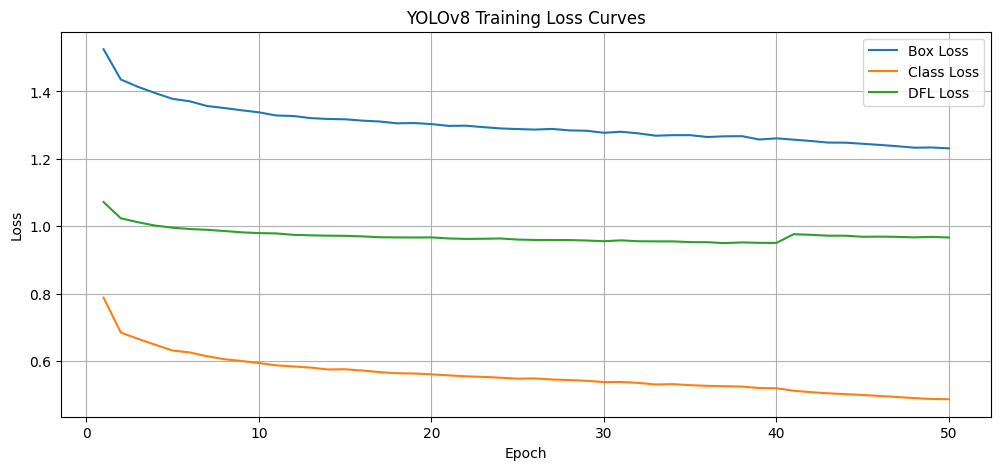

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/working/runs/detect/sku110k_training/yolov8m8/results.csv")

# Strip spaces from column names
df.columns = df.columns.str.strip()

plt.figure(figsize=(12,5))
plt.plot(df["epoch"], df["train/box_loss"], label="Box Loss")
plt.plot(df["epoch"], df["train/cls_loss"], label="Class Loss")
plt.plot(df["epoch"], df["train/dfl_loss"], label="DFL Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("YOLOv8 Training Loss Curves")
plt.legend()
plt.grid()
plt.show()

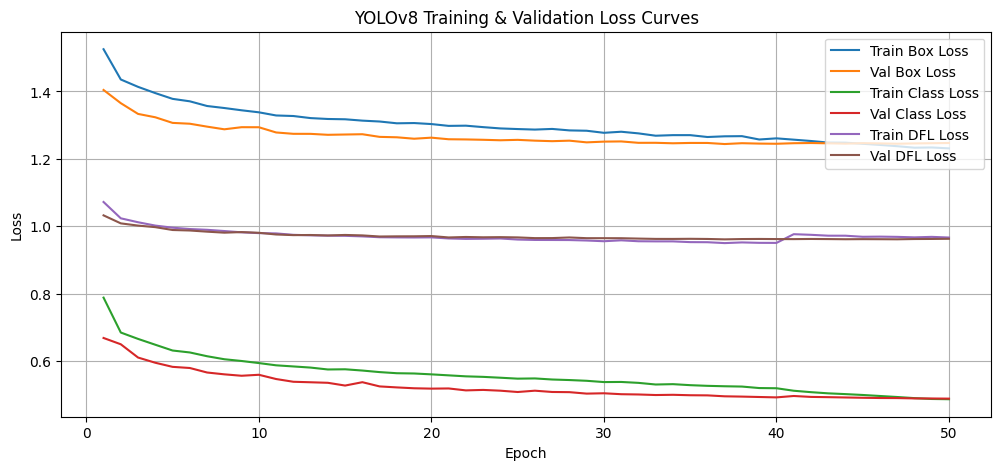

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/working/runs/detect/sku110k_training/yolov8m8/results.csv")

plt.figure(figsize=(12,5))
plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss")

plt.plot(df["epoch"], df["train/cls_loss"], label="Train Class Loss")
plt.plot(df["epoch"], df["val/cls_loss"], label="Val Class Loss")

plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("YOLOv8 Training & Validation Loss Curves")
plt.legend()
plt.grid()
plt.show()

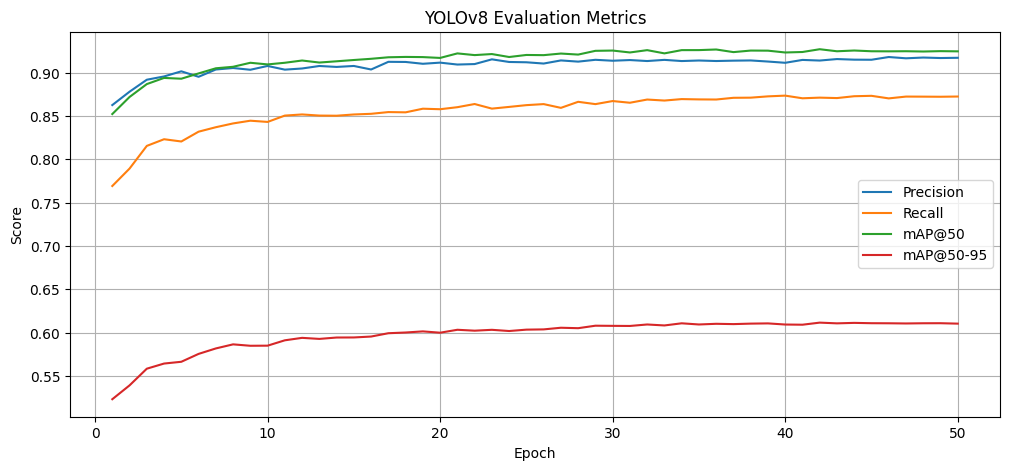

In [53]:
plt.figure(figsize=(12,5))
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@50")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP@50-95")

plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("YOLOv8 Evaluation Metrics")
plt.legend()
plt.grid()
plt.show()

In [54]:
!cp /kaggle/working/runs/detect/sku110k_training/yolov8m8/weights/best.pt /kaggle/working/

!zip best_model.zip /kaggle/working/best.pt

  adding: kaggle/working/best.pt (deflated 8%)
